# Individual Variability across cerebellum

In [2]:
import pandas as pd
import numpy as np
import torch as pt
import matplotlib.pyplot as plt
import seaborn as sb
import Functional_Fusion.dataset as ds
import ProbabilisticParcellation.util as ut
from copy import deepcopy
import ProbabilisticParcellation.learn_fusion_gpu as lf
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as sc
import ProbabilisticParcellation.export_atlas as ea
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.scripts.atlas_paper.symmetry as sm
import ProbabilisticParcellation.scripts.atlas_paper.describe_atlas as da
import Functional_Fusion.dataset as ds
import HierarchBayesParcel.evaluation as ev
import Functional_Fusion.atlas_map as am
import SUITPy as suit
import os
import ProbabilisticParcellation.scripts.atlas_paper.individual_variability as var
import nitools as nt
import nibabel as nb


In [3]:
figure_path = "/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/papers/AtlasPaper/figure_parts/"
if not os.path.exists(figure_path):
    figure_path = "/Users/callithrix/Dropbox/AtlasPaper/figure_parts/"
atlas_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'


In [4]:
# Get all task data and reliabilities
Data, Reliability = var.get_rel()

/Users/callithrix/code/Python/Functional_Fusion/dataset.py:250: RuntimeWarning: Mean of empty slice
  X1 -= np.nanmean(X1, axis=0)
/Users/callithrix/code/Python/Functional_Fusion/dataset.py:251: RuntimeWarning: Mean of empty slice
  X2 -= np.nanmean(X2, axis=0)
/Users/callithrix/code/Python/Functional_Fusion/dataset.py:253: RuntimeWarning: invalid value encountered in divide
  r[s, pn, :] = nansum(X1 * X2, axis=0) / \
/Users/callithrix/code/Python/Functional_Fusion/dataset.py:332: RuntimeWarning: Mean of empty slice
  Rel[i, :, :] = np.nanmean(r, axis=1)
/Users/callithrix/code/Python/Functional_Fusion/dataset.py:250: RuntimeWarning: Mean of empty slice
  X1 -= np.nanmean(X1, axis=0)
/Users/callithrix/code/Python/Functional_Fusion/dataset.py:251: RuntimeWarning: Mean of empty slice
  X2 -= np.nanmean(X2, axis=0)
/Users/callithrix/code/Python/Functional_Fusion/dataset.py:253: RuntimeWarning: invalid value encountered in divide
  r[s, pn, :] = nansum(X1 * X2, axis=0) / \
/Users/callithrix

In [7]:
# Get inter-individual variability
Corr, Corr_norm, Rel = var.get_var(Data, Reliability)

/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/individual_variability.py:159: RuntimeWarning: Mean of empty slice
  rel = np.nanmean(rel, axis=0).squeeze()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/individual_variability.py:150: RuntimeWarning: Mean of empty slice
  corr_mean = np.nanmean(corr_vox_up)
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/individual_variability.py:164: RuntimeWarning: Mean of empty slice
  rel = np.nanmean(
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/individual_variability.py:169: RuntimeWarning: Mean of empty slice
  reliabilities.append(np.nanmean(rel))


In [8]:
T = pd.read_csv(ut.base_dir + "/dataset_description.tsv", sep="\t")
cscale = (0,1)
# Get atlas
suit_atlas, _ = am.get_atlas("MNISymC2", ut.base_dir + "/Atlases")

# Plot Variabilities

## MDTB

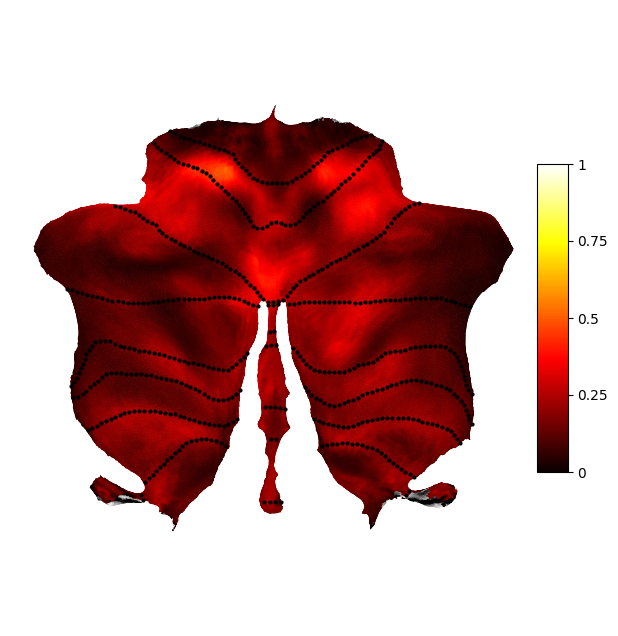

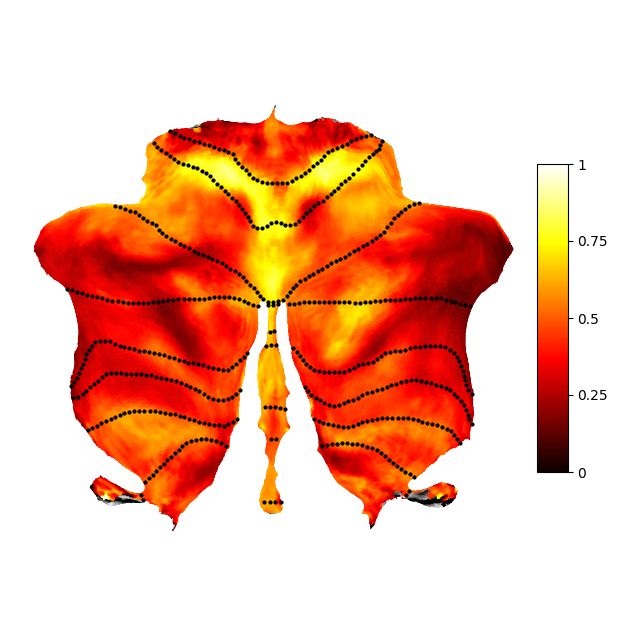

In [13]:
dataset = 'MDTB'
d = np.where([T.name == dataset])[0].item()

# Plot individual variability
Nifti = suit_atlas.data_to_nifti(Corr[d])
surf_data = suit.flatmap.vol_to_surf(Nifti, stats="nanmean", space="MNISymC")
figsize = (8, 8)
plt.figure(figsize=figsize)
suit.flatmap.plot(
    surf_data,
    render="matplotlib",
    new_figure=False,
    cmap="hot",
    cscale=cscale,
    overlay_type="func",
    colorbar=True,
    bordersize=4,
)
filename = f"var_{dataset}"
plt.savefig(f"{figure_path}/individual_variability/{filename}.png", dpi=300, bbox_inches="tight")


# Plot normalized individual variability
Nifti = suit_atlas.data_to_nifti(Corr_norm[d])
surf_data = suit.flatmap.vol_to_surf(Nifti, stats="nanmean", space="MNISymC")
figsize = (8, 8)
plt.figure(figsize=figsize)
suit.flatmap.plot(
    surf_data,
    render="matplotlib",
    new_figure=False,
    cmap="hot",
    cscale=cscale,
    overlay_type="func",
    colorbar=True,
    bordersize=4,
)
filename = f"var_norm_{dataset}_norm"
plt.savefig(f"{figure_path}/individual_variability/{filename}.png", dpi=300, bbox_inches="tight")

# Variability for all datasets

<AxesSubplot: title={'center': 'Somatotopic'}>

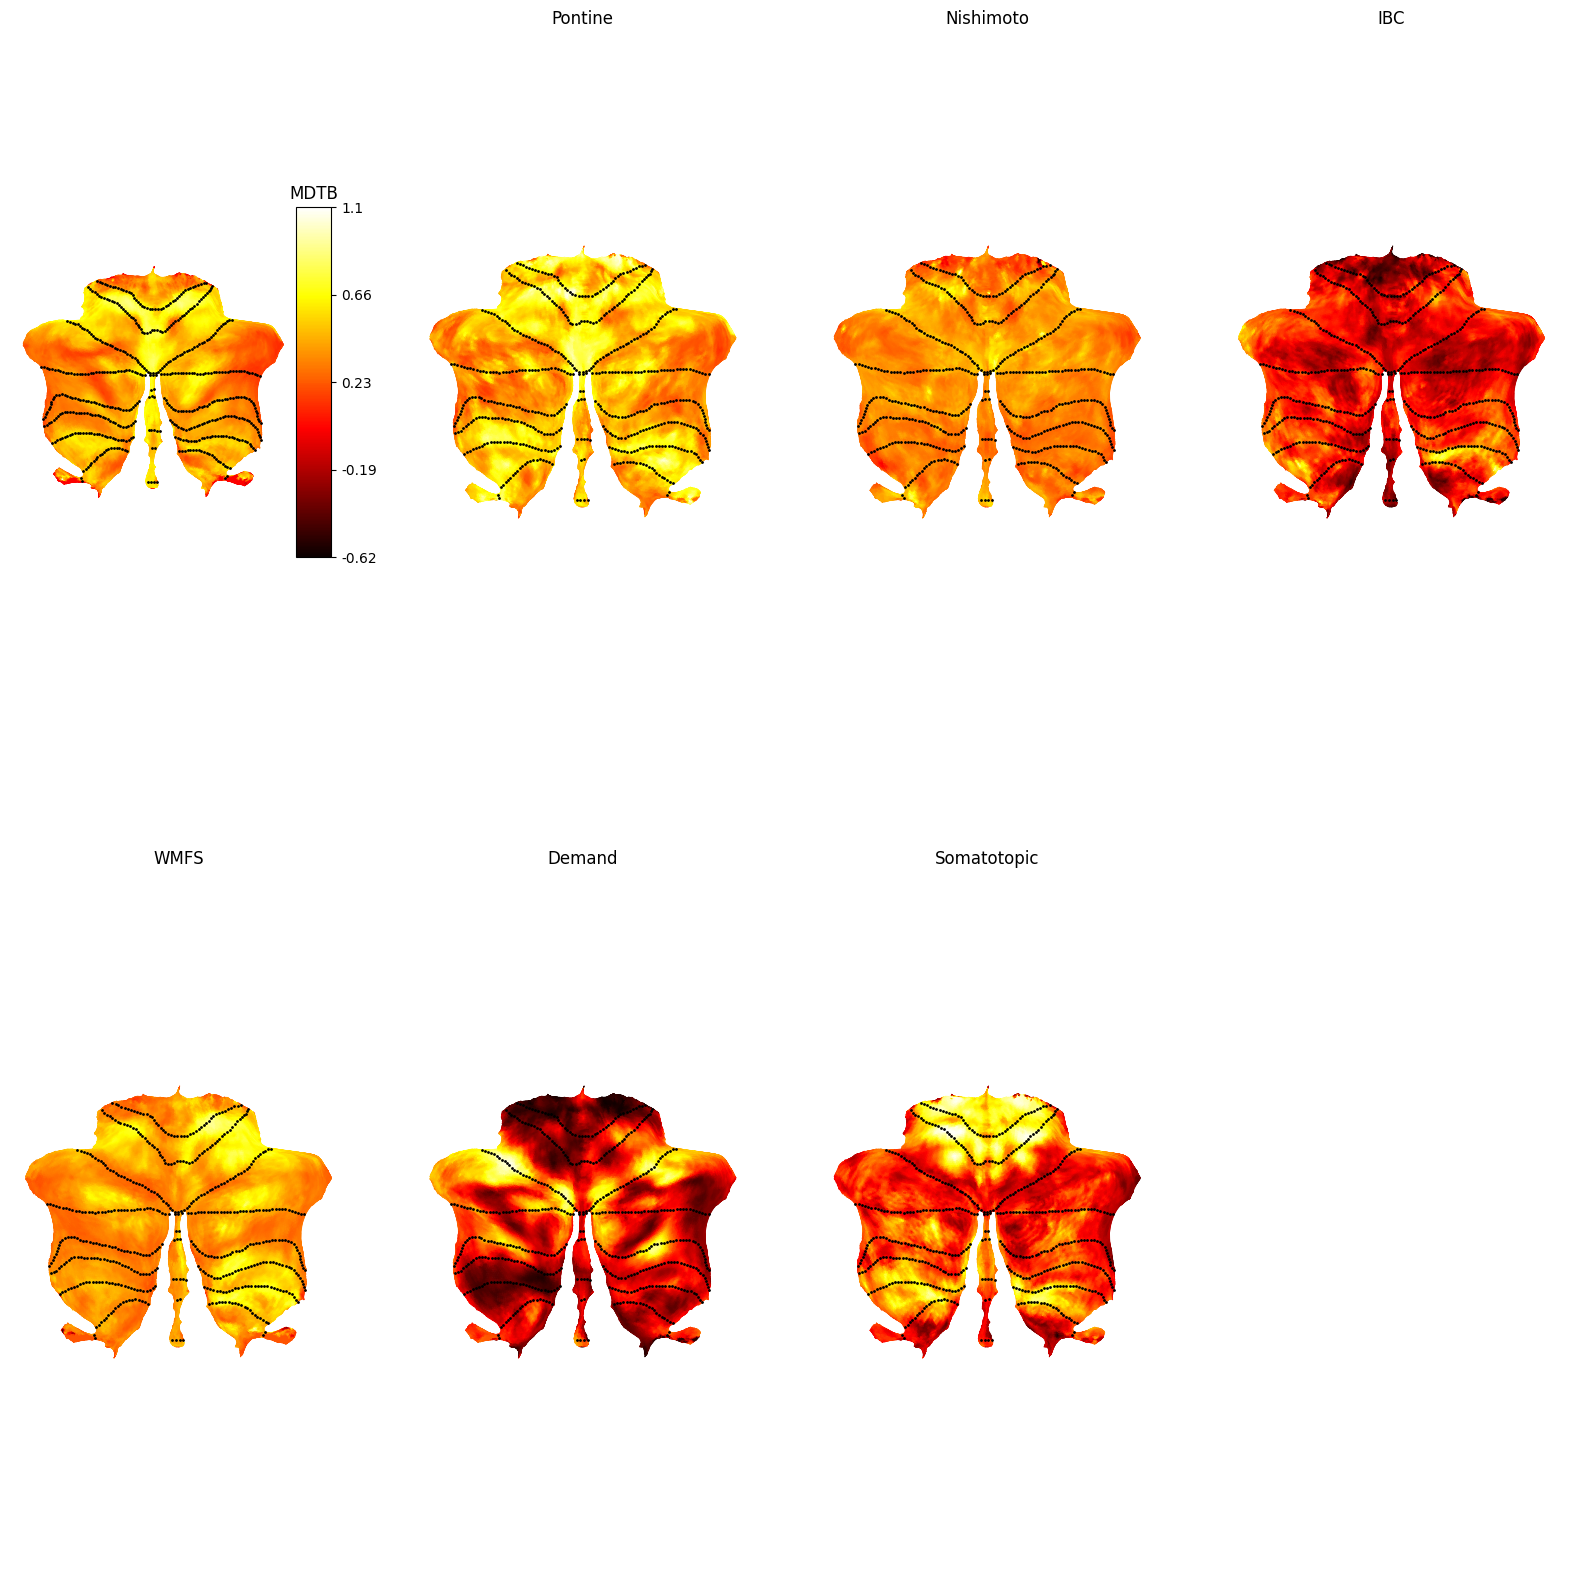

In [10]:
plt.figure(figsize=(20, 20))
ut.plot_multi_flat(Corr_norm, 'MNISymC2',
                   grid=(2, 4),
                   dtype='func',
                   colorbar=True,
                   cmap='hot',
                   titles=T.name[:-1].values)

# Average across datasets

In [11]:
# Average Corr_norm values apart fron Nishimoto & IBC
exclude = ['Nishimoto', 'IBC']
Corr_norm_mean = np.nanmean([Corr_norm[i] for i in range(len(Corr_norm)) if T.name[i] not in exclude], axis=0)

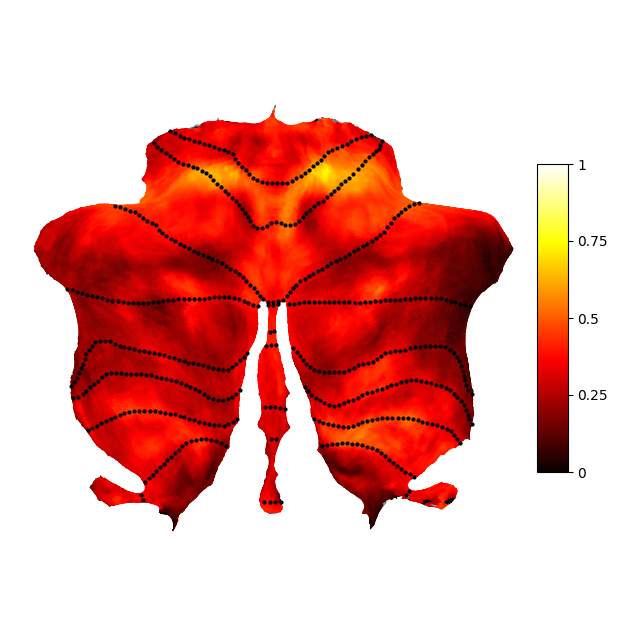

In [12]:
# Plot individual variability
Nifti = suit_atlas.data_to_nifti(Corr_norm_mean)
surf_data = suit.flatmap.vol_to_surf(Nifti, stats="nanmean", space="MNISymC")
figsize = (8, 8)
plt.figure(figsize=figsize)
suit.flatmap.plot(
    surf_data,
    render="matplotlib",
    new_figure=False,
    cmap="hot",
    cscale=cscale,
    overlay_type="func",
    colorbar=True,
    bordersize=4,
)
filename = f"var_all_norm"
plt.savefig(f"{figure_path}/individual_variability/{filename}.png", dpi=300, bbox_inches="tight")
